In [2]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import pandas as pd
import json

In [71]:
def conv(val, default_val="Nan"):
    try:
        return np.nan
    except ValueError:
        return default_val

taux_sans_risque = pd.read_csv("taux.csv", sep=';', index_col="date", parse_dates=True) 
    
taux_sans_risque = taux_sans_risque.replace(to_replace=r'^-$', value='NaN', regex=True)

for elt in taux_sans_risque.columns:
    taux_sans_risque[elt] = taux_sans_risque[elt].str.replace(',', '.').astype(float)

taux_sans_risque

,10 ans,1 mois,12 mois,2 ans,30 ans,3 mois,5 ans,6 mois,9 mois
date,,,,,,,,,
2020-02-11,-0.349,-0.607,-0.613,-0.721,0.346,-0.667,-0.702,-0.621,-0.640
2020-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-30,-0.342,-0.623,-0.631,-0.709,0.353,-0.663,-0.687,-0.612,-0.654
2020-10-29,-0.354,-0.632,-0.637,-0.734,0.340,-0.668,-0.694,-0.663,-0.656
2020-10-28,-0.326,-0.622,-0.634,-0.710,0.366,-0.665,-0.667,-0.660,-0.660
2020-10-27,-0.328,-0.594,-0.625,-0.708,0.361,-0.674,-0.675,-0.648,-0.658
2020-10-26,-0.292,-0.617,-0.623,-0.689,0.393,-0.662,-0.647,-0.645,-0.655
2020-10-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:

class RESTManager:
    HOST_NAME = "dolphin.jump-technology.com"
    PORT = "8443"

    URL = "https://" + HOST_NAME + ":" + PORT + "/api/v1/"

    USERNAME_USER1 = "EPITA_GROUPE8"
    PASSWORD_USER1 = "AgLyQx64Jw6pAkW9"

    auth = (USERNAME_USER1, PASSWORD_USER1)


    def get(self, path):
        return requests.get(self.URL+path, auth=self.auth, verify=False).text
    
    def post(self, path):
        return requests.post(self.URL+path, auth=self.auth, verify=False).text
    
    def get_asset(self):
        dt_text = self.get("asset")
        dt = json.loads(dt_text)
        df = []
        for i in range(len(dt)):
            tmp = {}
            for key in dt[i]:
                tmp[key] = dt[i][key]["value"]
            df.append(tmp)
        df = pd.DataFrame(df)
        return df
    
    def get_asset_id(self, uid):
        dt_text = self.get(f"asset/{uid}")
        dt = json.loads(dt_text)
        df={}
        for key in dt:
            df[key] = dt[key]["value"]
        #df = pd.DataFrame(df)
        return df
    
    def get_asset_id_quote(self, uid):
        dt_text = self.get(f"asset/{uid}/quote")
        dt = json.loads(dt_text)
        df = []
        for i in range(len(dt)):
            tmp = {}
            for key in dt[i]:
                tmp[key] = dt[i][key]["value"]
            df.append(tmp)
        df = pd.DataFrame(df)
        df = df.set_index('date')
        l = ["ask" ,"asset" ,"bid" ,"close" ,"feed_source" ,"gross" ,"high" ,"low","nav" ,"open", "pl" ,"real_close_price" ,"return" ,"volume"]
        for elt in l:
            df[elt] = df[elt].str.replace(',', '.').astype(float)
        return df
    
    def get_ratio(self):
        self.get("ratio")
    
    def sharpe(self, df, taux_sans_risque, periode=30):
        df['Log_Ret'] = np.log(df['close'] / df['close'].shift(1))
        df['Volatility'] = df['Log_Ret'].rolling(window=periode).std() * np.sqrt(periode)
        sharpe = (df["return"] - taux_sans_risque["1 mois"])/df["Volatility"]
        return sharpe
        

req = RESTManager()

In [27]:
df_asset = req.get_asset()

/home/Thomas/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [28]:
df_asset[["ASSET_DATABASE_ID","LAST_GROSS_VALUE", "MARKET_PLACE_MIC", "CURRENCY", "LAST_QUOTE_DATE","MARKET_PLACE_CURRENCY"]]

,ASSET_DATABASE_ID,LAST_GROSS_VALUE,MARKET_PLACE_MIC,CURRENCY,LAST_QUOTE_DATE,MARKET_PLACE_CURRENCY
0,1845,"26,158358284815 EUR",XETR,EUR,2020-10-23,EUR
1,1846,"28,129136522277 EUR",XPAR,EUR,2020-10-23,EUR
2,2122,"82,928847761071 EUR",NaN,EUR,2020-10-23,EUR
3,2123,"42,844024261715 EUR",NaN,EUR,2020-10-23,EUR
4,2124,"5,624308945175 EUR",NaN,EUR,2020-10-23,EUR
5,1428,"9,305059505649 EUR",NaN,EUR,2020-10-23,EUR
6,1847,"30,682432843433 EUR",TOMX,EUR,2020-10-23,EUR
7,1848,"40,005449974221 EUR",XETR,EUR,2020-10-23,EUR
8,1849,"7,680015926775 EUR",XPAR,EUR,2020-10-23,EUR
9,2154,"137,736219606939 USD",NaN,USD,2020-10-23,EUR


In [65]:
req.get_asset_id("1845")

/home/Thomas/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'REST_OBJECT_ID': '1845',
 'REST_UNIQUE_NUMBER': '1845',
 'LABEL': '1&1 DRILLISCH AG',
 'TYPE': 'STOCK',
 'CURRENCY': 'EUR',
 'BLOOMBERG_CODE': 'DRI GY EQUITY',
 'ISIN_CODE': 'DE0005545503',
 'SUB_SECTOR': 'Télécommunications mobiles',
 'MARKET_PLACE': 'FRANCFORT (XETR)',
 'FLOATING_VALUE': '0,2654572',
 'COUNTRY': 'Allemagne',
 'IS_PUBLICLY_TRADED': 'true',
 'MARKET_PLACE_TELEKURS': '44',
 'GICS_SUB_INDUSTRY': 'Services de Télécommunication Mobile',
 'QUOTE_TYPE': 'value',
 'IS_STRUCTURED_PRODUCT': 'false',
 'IS_DEPOSITARY_QUOTES': 'false',
 'IS_ACCESSIBILITY_PUBLIC': 'true',
 'ASSET_STATUS': 'normal',
 'CITY_OR_ACRONYM_OR_NAME': 'FRANCFORT',
 'SEDOL_CODE': '5734672',
 'SUB_TYPE': 'ORDINARY_STOCK',
 'CODE_CIC': 'DE31',
 'STOCK_TYPE': 'Ordinaire',
 'LIQUIDITY_ALGO': 'UseGridLiquidityAlgorithm',
 'BLOOMBERG_ID': 'BBG000BD8RR1',
 'quote_value_type': 'Défaut',
 'ASSET PRICE MODE': 'Par Défaut (configuration)',
 'PAY_ACCOUNT_ON_DEFAULT': 'false',
 'ASSET_DATABASE_ID': '1845',
 'EMIR_CLEAR

In [66]:
req.get("ratio")

/home/Thomas/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


'[{"id":11,"type":"Ratio","name":"Correlation","is_benchmark_needed":true,"is_percent":false},{"id":7,"type":"Ratio","name":"Exposition action","is_benchmark_needed":false,"is_percent":true},{"id":15,"type":"Ratio","name":"Exposition action","is_benchmark_needed":false,"is_percent":true},{"id":8,"type":"Ratio","name":"RDT","is_benchmark_needed":false,"is_percent":true},{"id":13,"type":"Ratio","name":"Rendement","is_benchmark_needed":false,"is_percent":true},{"id":9,"type":"Ratio","name":"Rendement_annualise","is_benchmark_needed":false,"is_percent":true},{"id":12,"type":"Ratio","name":"Sharpe","is_benchmark_needed":false,"is_percent":false},{"id":14,"type":"Ratio","name":"VaR historique","is_benchmark_needed":false,"is_percent":true},{"id":10,"type":"Ratio","name":"Volatilite","is_benchmark_needed":false,"is_percent":true}]'

In [31]:
df = req.get_asset_id_quote("1845")
df

/home/Thomas/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


,ask,asset,bid,close,feed_source,gross,high,low,nav,open,pl,real_close_price,return,volume
date,,,,,,,,,,,,,,
2013-06-03,12.580,1845.0,12.580,12.585000,-10.0,12.585000,12.670,12.080,12.585000,12.600,0.000000,12.585000,0.000000,742280.0
2013-06-04,12.670,1845.0,12.590,12.670000,-10.0,12.670000,12.950,12.500,12.670000,12.650,0.085000,12.670000,0.006754,544604.0
2013-06-05,12.370,1845.0,12.295,12.350000,-10.0,12.350000,12.660,12.340,12.350000,12.579,-0.320000,12.350000,-0.025257,649313.0
2013-06-06,12.370,1845.0,12.355,12.355000,-10.0,12.355000,12.450,12.250,12.355000,12.350,0.005000,12.355000,0.000405,371998.0
2013-06-07,12.555,1845.0,12.475,12.480000,-10.0,12.480000,12.630,12.250,12.480000,12.350,0.125000,12.480000,0.010117,303439.0
2013-06-10,12.495,1845.0,12.415,12.430000,-10.0,12.430000,12.625,12.370,12.430000,12.445,-0.050000,12.430000,-0.004006,210296.0
2013-06-11,12.445,1845.0,12.380,12.405000,-10.0,12.405000,12.481,12.265,12.405000,12.370,-0.025000,12.405000,-0.002011,285197.0
2013-06-12,12.325,1845.0,12.300,12.300000,-10.0,12.300000,12.435,12.280,12.300000,12.375,-0.105000,12.300000,-0.008464,310978.0
2013-06-13,12.125,1845.0,12.050,12.010000,-10.0,12.010000,12.320,11.715,12.010000,12.235,-0.290000,12.010000,-0.023577,1020589.0


In [17]:
df["return"].mean()

0.0005749722249225499

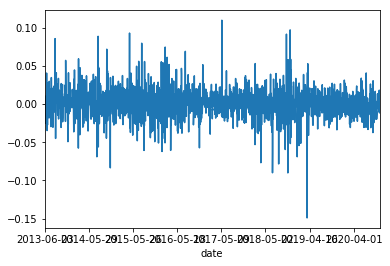

In [18]:
df["return"].plot()

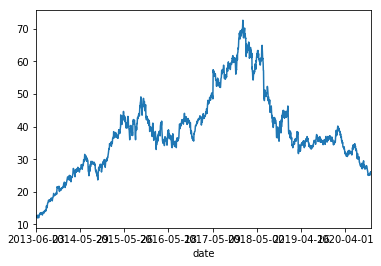

In [19]:
df["close"].plot()

In [32]:
df['Log_Ret'] = np.log(df['close'] / df['close'].shift(1))

df['Volatility'] = df['Log_Ret'].rolling(window=30).std() * np.sqrt(30)
print(df.tail(15))

            ask   asset  bid      close  feed_source      gross  high  low  \
date                                                                         
2020-10-05  NaN  1845.0  NaN  25.175762        -10.0  25.175762   NaN  NaN   
2020-10-06  NaN  1845.0  NaN  25.051503        -10.0  25.051503   NaN  NaN   
2020-10-07  NaN  1845.0  NaN  25.385166        -10.0  25.385166   NaN  NaN   
2020-10-08  NaN  1845.0  NaN  25.326343        -10.0  25.326343   NaN  NaN   
2020-10-09  NaN  1845.0  NaN  25.179487        -10.0  25.179487   NaN  NaN   
2020-10-12  NaN  1845.0  NaN  25.316439        -10.0  25.316439   NaN  NaN   
2020-10-13  NaN  1845.0  NaN  25.319081        -10.0  25.319081   NaN  NaN   
2020-10-14  NaN  1845.0  NaN  25.288430        -10.0  25.288430   NaN  NaN   
2020-10-15  NaN  1845.0  NaN  25.357970        -10.0  25.357970   NaN  NaN   
2020-10-16  NaN  1845.0  NaN  25.122260        -10.0  25.122260   NaN  NaN   
2020-10-19  NaN  1845.0  NaN  25.382643        -10.0  25.382643 

In [29]:
taux_sans_risque_1_year = -0,623

In [72]:
sharpe = (df["return"] - taux_sans_risque["1 mois"])/df["Volatility"]
sharpe

date
1987-01-02          NaN
1987-01-03          NaN
1987-01-04          NaN
1987-01-05          NaN
1987-01-06          NaN
1987-01-07          NaN
1987-01-08          NaN
1987-01-09          NaN
1987-01-10          NaN
1987-01-11          NaN
1987-01-12          NaN
1987-01-13          NaN
1987-01-14          NaN
1987-01-15          NaN
1987-01-16          NaN
1987-01-17          NaN
1987-01-18          NaN
1987-01-19          NaN
1987-01-20          NaN
1987-01-21          NaN
1987-01-22          NaN
1987-01-23          NaN
1987-01-24          NaN
1987-01-25          NaN
1987-01-26          NaN
1987-01-27          NaN
1987-01-28          NaN
1987-01-29          NaN
1987-01-30          NaN
1987-01-31          NaN
                ...    
2020-10-22    10.593633
2020-10-23    10.744459
2020-10-24          NaN
2020-10-25          NaN
2020-10-26          NaN
2020-10-27          NaN
2020-10-28          NaN
2020-10-29          NaN
2020-10-30          NaN
2020-10-31          NaN
2020-11-01 